In [33]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
import pandas as pd




In [34]:
flowers = pd.read_csv('./iris-data.csv')
flowers
flowers_copy = flowers.copy()
flowers_copy

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
flowers.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
# missing values

flowers.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

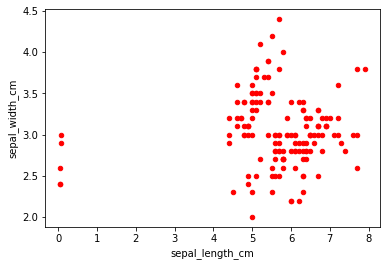

In [38]:
#hago un plot exploratorio de los valores del sépalo

flowers.plot(kind='scatter',x='sepal_length_cm', y='sepal_width_cm',color='red')
plt.show()

In [39]:
#voy a ver esos outliers a la izquierda

flowers[flowers['sepal_length_cm']<0.1]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [40]:
#parece que el input se ha metido en una media incorrecta, los corrijo

def adjust_cms(x):
    if x < 0.1:
        a= x*100
        return a
    else:
        return x
    
flowers_copy['sepal_length_cm'] = flowers_copy['sepal_length_cm'].apply(adjust_cms)
flowers_copy

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [41]:
flowers_copy[flowers_copy['sepal_length_cm']<0.1]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


<AxesSubplot:xlabel='sepal_length_cm', ylabel='sepal_width_cm'>

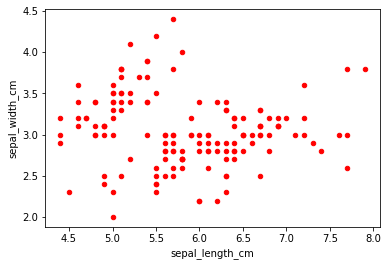

In [42]:
flowers_copy.plot(kind='scatter',x='sepal_length_cm', y='sepal_width_cm',color='red')
#vemos ahora que tiene buena pinta
#repetimos con los pétalos

<AxesSubplot:xlabel='petal_length_cm', ylabel='petal_width_cm'>

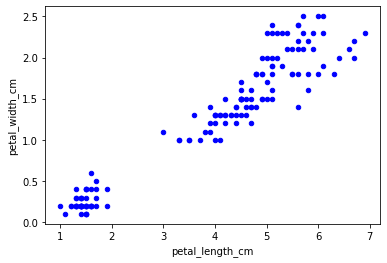

In [45]:
flowers_copy.plot(kind='scatter',x='petal_length_cm', y='petal_width_cm',color='blue')

In [46]:
#voy a comprobar si los dos grupos diferenciados pueden ser debido a la clase de planta
flowers_copy['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [57]:
#primero voy a correjir lo que parece un typo con la clase iris_setossa y agrupar versicolor en un único nombre
#que sigue el formato del resto 

flowers_copy['class'] = flowers_copy['class'].replace(['Iris-setossa'],'Iris-setosa')
flowers_copy['class'] = flowers_copy['class'].replace(['versicolor'],'Iris-versicolor')
flowers_copy['class'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [58]:
#divido el dataset en typos para plotearlo y ver si detecto algo
flowers_virginica= flowers_copy[flowers_copy['class']=='Iris-virginica']
flowers_setosa= flowers_copy[flowers_copy['class']=='Iris-setosa']
flowers_versicolor= flowers_copy[flowers_copy['class']=='Iris-versicolor']

<AxesSubplot:xlabel='petal_length_cm', ylabel='petal_width_cm'>

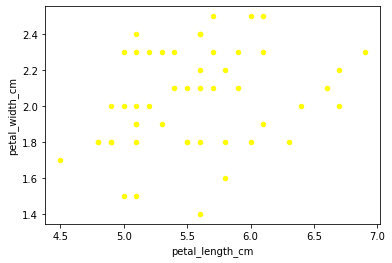

In [59]:
flowers_virginica.plot(kind='scatter',x='petal_length_cm', y='petal_width_cm',color='yellow')

<AxesSubplot:xlabel='petal_length_cm', ylabel='petal_width_cm'>

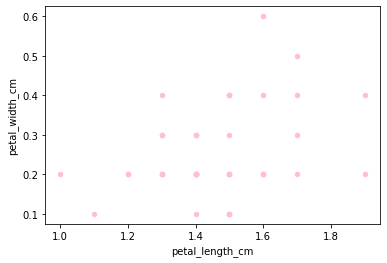

In [60]:
flowers_setosa.plot(kind='scatter',x='petal_length_cm', y='petal_width_cm',color='pink')

<AxesSubplot:xlabel='petal_length_cm', ylabel='petal_width_cm'>

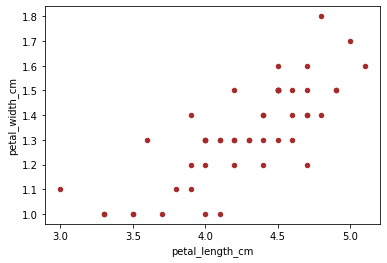

In [61]:
flowers_versicolor.plot(kind='scatter',x='petal_length_cm', y='petal_width_cm',color='brown')

In [ ]:
#los tres plots parecen tener sentido ya que hacen foco en un área distinta del plot global

In [62]:
flowers_copy.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [70]:
flowers_copy[flowers_copy['petal_width_cm'].isna()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


<AxesSubplot:xlabel='petal_length_cm', ylabel='petal_width_cm'>

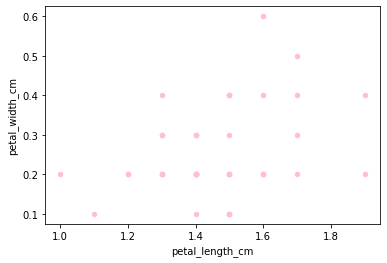

In [74]:
#le vuelvo a echar un vistazo
flowers_setosa.plot(kind='scatter',x='petal_length_cm', y='petal_width_cm',color='pink')

<AxesSubplot:xlabel='sepal_length_cm', ylabel='sepal_width_cm'>

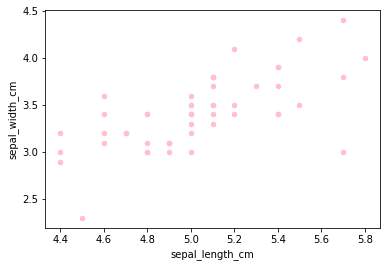

In [75]:
flowers_setosa.plot(kind='scatter',x='sepal_length_cm', y='sepal_width_cm',color='pink')

In [77]:
#no veo nada raro en esos valores así que para no perderlos voy a sustituir los nulos por la media de esa clase
flowers_copy['petal_width_cm'] = flowers_copy['petal_width_cm'].fillna(flowers_setosa['petal_width_cm'].mean())
flowers_copy.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='sepal_width_cm'>

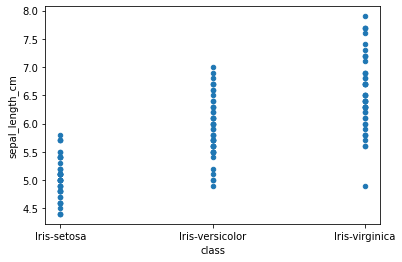

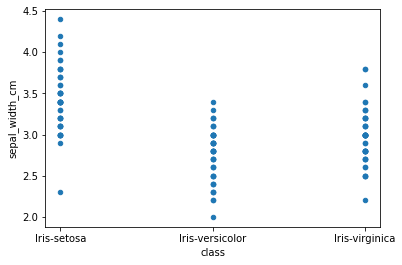

In [85]:
flowers_copy.plot(kind='scatter',x='class',y='sepal_length_cm')
flowers_copy.plot(kind='scatter',x='class',y='sepal_width_cm')

<AxesSubplot:xlabel='class', ylabel='petal_width_cm'>

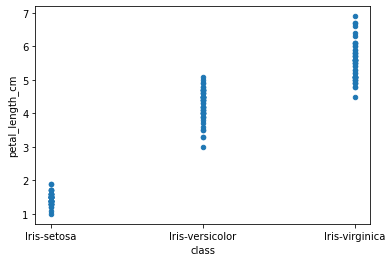

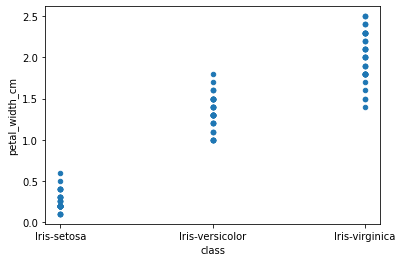

In [84]:
flowers_copy.plot(kind='scatter',x='class',y='petal_length_cm')
flowers_copy.plot(kind='scatter',x='class',y='petal_width_cm')

In [ ]:
#Me parece que tiene buena pinta la distribución, se ve algun outlier pero realmente no veo motivos para quitarlos